# <span style="color: #66cdaa ;">Verinin Yüklenmesi ve Ortak Dataframe'e Atanması</span>

In [47]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered", category=RuntimeWarning)

In [48]:
root_dir = os.getcwd()

csv_files = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file)
                             )
data = pd.read_csv(csv_files[0])

# Veri setlerini Customer ID üzerinde outer join kullanarak birleştirdik.
for file in csv_files[1:]:
    df = pd.read_csv(file)
    data = pd.merge(data, df, on="Customer ID", how="outer")

In [49]:
# Oluşturulan verinin ilk 5 satırına göz atalım.
data.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,...,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1516050,2022.0,3.0,2022-07-01,2022-08-26,10.0,5.0,Once a Month,5.0,5.0,...,NaN,9.0,418.0,NaN,109.0,Taiwan,Retail,Fashion Retailer,Onboarding,Long-tail
1,CRM-1516050,2022.0,3.0,2022-07-01,2022-08-26,10.0,5.0,Once a Month,5.0,5.0,...,NaN,9.0,418.0,NaN,112.0,Taiwan,Retail,Fashion Retailer,Onboarding,Long-tail
2,CRM-1516050,2022.0,3.0,2022-07-01,2022-09-27,10.0,5.0,Once a Month,5.0,5.0,...,NaN,9.0,418.0,NaN,109.0,Taiwan,Retail,Fashion Retailer,Onboarding,Long-tail
3,CRM-1516050,2022.0,3.0,2022-07-01,2022-09-27,10.0,5.0,Once a Month,5.0,5.0,...,NaN,9.0,418.0,NaN,112.0,Taiwan,Retail,Fashion Retailer,Onboarding,Long-tail
4,CRM-1470950,2022.0,1.0,2022-01-01,2022-03-25,4.0,3.0,Once a Day,2.0,3.0,...,"$732,199",30.0,366.0,3.0,160.0,Thailand,Retail,Marketplace,Retained,Enterprise


# <span style="color: #66cdaa ;">Verinin Keşfi ve Temizlenmesi</span>

In [50]:
# Sütunlardaki veri noktalarının tutarlılığının ve her sütunun türünün incelenmesi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10572 entries, 0 to 10571
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Customer ID                                                                10556 non-null  object 
 1   Year                                                                       8495 non-null   float64
 2   Quarter                                                                    8495 non-null   float64
 3   Survey Date                                                                8495 non-null   object 
 4   Response Date                                                              8495 non-null   object 
 5   How likely are you to recommend insider to a friend or colleague           8495 non-null   float64
 6   How would you rate the value you gain from our company

### <span style="color: #556b2f ;">Buradaki çıktıdan gördüğümüz üzere sütunlar arasındaki veri noktaları arasında büyük farklar var. Büyük ihtimalle eksik veri ve hatta çifte veriler bulunuyor olabilir. Ayrıca sütunların genelinin tipi doğru olsa da MRR ve Total Revenue sütunlarındaki değerleri sayısal formata çevirebiliriz.</span>

## <span style="color: #66cdaa ;">Çifte Veri ve Eksik Veri Analizi</span>

In [51]:
# Veri setindeki çifte verilerin sayısını inceleyelim.
data.duplicated().sum()

256

In [52]:
# 256 gibi ufak bir boyutta çifte veri var. Bunları çıkarmaya karar verdik.
data = data.drop_duplicates()

In [53]:
# Verinin bütün boyutunu kontrol edelim.
data.shape

(10316, 23)

In [54]:
# Veri setindeki eksik değerleri inceleyelim.
data.isna().sum()

Customer ID                                                                     6
Year                                                                         2067
Quarter                                                                      2067
Survey Date                                                                  2067
Response Date                                                                2067
How likely are you to recommend insider to a friend or colleague             2067
How would you rate the value you gain from our company                       2067
How frequently are you using our platform                                    2076
Please rate the overall quality of our products                              2067
Please rate the usability of the panel                                       2363
Please rate your understanding of our reporting capabilities in the panel    2067
Customer Age (Months)                                                          64
MRR             

In [55]:
# Veri dosyalarını birleştirirken veri noktalarını eşlemek adına yeni noktalar oluşturulmuş olabilir.
# Rating verilerinde tutarlı yani eşit sayıda eksik veri bulunduğu için bunları ortak veri noktaları kabul edebiliriz.
# 2067 eksik veri bulunan rating sütunlarından birinin eksik verilerini çıkarmayı deneyelim.

In [56]:
data = data.dropna(subset=['Please rate the overall quality of our products'])

In [57]:
# Görünüşe göre varsayımımız doğruymuş. Eksik veri bulunan sütunlardaki eksik verilerin çoğunluğu ortak.
# Company Newsletter sütununda devasa sayıda eksik veri bulunduğu için bir içgörü elde edemeyeceğimiz için çıkaracağız.
data.isna().sum()

Customer ID                                                                     0
Year                                                                            0
Quarter                                                                         0
Survey Date                                                                     0
Response Date                                                                   0
How likely are you to recommend insider to a friend or colleague                0
How would you rate the value you gain from our company                          0
How frequently are you using our platform                                       9
Please rate the overall quality of our products                                 0
Please rate the usability of the panel                                        296
Please rate your understanding of our reporting capabilities in the panel       0
Customer Age (Months)                                                          10
MRR             

In [58]:
data = data.drop(columns = ['Company Newsletter Interaction Count'], axis = 1)

In [59]:
data.isna().sum()

Customer ID                                                                     0
Year                                                                            0
Quarter                                                                         0
Survey Date                                                                     0
Response Date                                                                   0
How likely are you to recommend insider to a friend or colleague                0
How would you rate the value you gain from our company                          0
How frequently are you using our platform                                       9
Please rate the overall quality of our products                                 0
Please rate the usability of the panel                                        296
Please rate your understanding of our reporting capabilities in the panel       0
Customer Age (Months)                                                          10
MRR             

In [60]:
cevirilecek_sutunlar = ['MRR', 'Total Revenue']

# Döngü içerisinde tanımlanan iki sütunumuz için dolar simgeleri kaldırıyoruz ve sayısal formata çeviriyoruz.
for sutun in cevirilecek_sutunlar:
    if sutun in data.columns:
        data[sutun] = pd.to_numeric(data[sutun].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

## <span style="color: #66cdaa ;">İstatistiksel Analiz</span>

In [61]:
data.describe()

,Year,Quarter,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,Please rate the overall quality of our products,Please rate the usability of the panel,Customer Age (Months),MRR,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Product Bug Task Count
count,8249.0,8249.000000,8249.000000,8249.000000,8249.000000,7953.000000,8239.000000,7873.000000,6.965000e+03,7642.000000,7642.000000,8249.000000
mean,2022.0,2.064008,8.357862,4.294824,4.159050,4.061486,35.596796,5730.993014,2.368790e+07,33.411280,758.672468,142.609286
std,0.0,0.833801,1.588773,0.744930,0.799591,0.812606,17.757363,7802.758455,1.679302e+08,41.783264,442.521643,39.206737
min,2022.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,43.000000,0.000000e+00,1.000000,12.000000,5.000000
25%,2022.0,1.000000,8.000000,4.000000,4.000000,4.000000,22.000000,1549.000000,2.770000e+04,10.000000,467.000000,116.000000
50%,2022.0,2.000000,8.000000,4.000000,4.000000,4.000000,29.000000,3459.000000,2.440780e+05,24.000000,656.000000,151.000000
75%,2022.0,3.000000,10.000000,5.000000,5.000000,5.000000,48.000000,6982.000000,9.661960e+05,44.000000,929.000000,174.000000
max,2022.0,3.000000,10.000000,5.000000,5.000000,5.000000,72.000000,62732.000000,2.789805e+09,443.000000,3922.000000,200.000000


### <span style="color: #556b2f ;">Bazı rating sütunlarında minimum 0 değerlerini inceliyoruz. Bu girdiler hatalı veya eksik veri olabilir. Veri setine oranlarını incelememiz gerek. Aynı şekilde Total Revenue 0'dan başlıyor. Çoğu satırda standart sapma yüksek ve fazlaca büyük uç değerler bulunuyor. Eğer bir çözümü makine öğrenmesi ile yapacaksak bu değerlere dikkat etmeliyiz.</span>

In [62]:
sutunlar = ['MRR', 'Total Revenue','How likely are you to recommend insider to a friend or colleague','Please rate the overall quality of our products']

for sutun in sutunlar:
    if sutun not in data.columns:
        print(f"Key Error: '{sutun}'")
    else:
        sifir_sayac = (data[sutun] == 0).sum()
        print(f"{sutun} sütununda 0 değeri olan satır sayısı: {sifir_sayac}")

MRR sütununda 0 değeri olan satır sayısı: 0
Total Revenue sütununda 0 değeri olan satır sayısı: 713
Key Error: 'How likely are you to recommend insider to a friend or colleague'
Please rate the overall quality of our products sütununda 0 değeri olan satır sayısı: 54


In [63]:
# Key error hatası aldık. Sütun isimlerini kontrol edelim.
data.columns

Index(['Customer ID', 'Year', 'Quarter', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel',
       'Customer Age (Months)', 'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Product Bug Task Count', 'Region',
       'Vertical', 'Subvertical', 'Status', 'Customer Level'],
      dtype='object')

In [64]:
# Key error hatası aldığımız sütunun sonunda bir boşluk olduğunu görüyoruz. En iyisi sonradan uğraşmamak için yeniden adlandıralım.
yeni_isimler = {
    'Customer ID': 'CustomerID',
    'How likely are you to recommend insider to a friend or colleague ': 'RatingOfRecommendation',
    'How would you rate the value you gain from our company': 'RatingOfValue',
    'How frequently are you using our platform': 'FrequencyOfUse',
    'Please rate the overall quality of our products': 'RatingOfQuality',
    'Please rate the usability of the panel': 'RatingOfPanelUsability',
    'Please rate your understanding of our reporting capabilities in the panel': 'RatingOfReportingCapabilities',
    'Customer Age (Months)': 'CustomerAgeMonths',
    'Help Ticket Lead Time (hours)': 'HelpTicketLeadTimeHours',
}

data.rename(columns=yeni_isimler, inplace=True)
data.columns

Index(['CustomerID', 'Year', 'Quarter', 'Survey Date', 'Response Date',
       'RatingOfRecommendation', 'RatingOfValue', 'FrequencyOfUse',
       'RatingOfQuality', 'RatingOfPanelUsability',
       'RatingOfReportingCapabilities', 'CustomerAgeMonths', 'MRR',
       'Total Revenue', 'Help Ticket Count', 'HelpTicketLeadTimeHours',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level'],
      dtype='object')

In [65]:
sutunlar = ['MRR', 'Total Revenue','RatingOfRecommendation','RatingOfQuality']

for sutun in sutunlar:
    sifir_sayac = data[data[sutun] == 0].shape[0]
    print(f"{sutun} sütununda 0 değeri olan satır sayısı: {sifir_sayac}")

MRR sütununda 0 değeri olan satır sayısı: 0
Total Revenue sütununda 0 değeri olan satır sayısı: 713
RatingOfRecommendation sütununda 0 değeri olan satır sayısı: 21
RatingOfQuality sütununda 0 değeri olan satır sayısı: 54


### <span style="color: #556b2f ;">Burada sormamız gereken soru: Gerçekten müşterilerimiz platformumuzdan 0 kazanç elde etmiş olabilir mi? Yoksa bu 0 değerleri yanlış girdiler veya eksik veriler mi? MRR'da 0 değeri bulunmuyor. Yani müşterilerimiz bize aylık olarak bir abonelik ücreti veriyor. Rating sütunlarının 0 olamayacağını düşündüğüm için bunları çıkaracağım.</span>

In [66]:
sutunlar = ['Total Revenue','RatingOfRecommendation','RatingOfQuality']

for sutun in sutunlar:
    data = data[data[sutun] != 0]
    sifir_sayac = data[data[sutun] == 0].shape[0]
    print(f"{sutun} sütununda 0 değeri olan satır sayısı: {sifir_sayac}")

Total Revenue sütununda 0 değeri olan satır sayısı: 0
RatingOfRecommendation sütununda 0 değeri olan satır sayısı: 0
RatingOfQuality sütununda 0 değeri olan satır sayısı: 0


In [67]:
data.isna().sum()

CustomerID                          0
Year                                0
Quarter                             0
Survey Date                         0
Response Date                       0
RatingOfRecommendation              0
RatingOfValue                       0
FrequencyOfUse                      8
RatingOfQuality                     0
RatingOfPanelUsability            272
RatingOfReportingCapabilities       0
CustomerAgeMonths                   9
MRR                               365
Total Revenue                    1264
Help Ticket Count                 471
HelpTicketLeadTimeHours           471
Product Bug Task Count              0
Region                              9
Vertical                           19
Subvertical                        55
Status                              9
Customer Level                      9
dtype: int64

In [68]:
# Status, Customer Level, Region, Vertical, Subvertical, FrequencyOfUse sütunları object olduğu için Label Encoder kullanacağız.
# Label Encoder ile her bir eşsiz değere bir index atayacağız ve o index sayılarının ortalamasını alıp yuvarlayarak eksik verileri dolduracağız.

In [69]:
from sklearn.preprocessing import LabelEncoder

sutunlar = ['Status','Customer Level','Region', 'Vertical', 'Subvertical','FrequencyOfUse']

label_encoder = LabelEncoder()

for sutun in sutunlar:
    mask = data[sutun].isna()
    label_encoder = LabelEncoder()
    data.loc[~mask, sutun] = label_encoder.fit_transform(data.loc[~mask, sutun].astype(str))
    ortalama_deger = np.round(data.loc[~mask, sutun].astype(float).mean())
    data.loc[mask, sutun] = ortalama_deger
    data[sutun] = label_encoder.inverse_transform(data[sutun].astype(int))

print(data.isna().sum())

CustomerID                          0
Year                                0
Quarter                             0
Survey Date                         0
Response Date                       0
RatingOfRecommendation              0
RatingOfValue                       0
FrequencyOfUse                      0
RatingOfQuality                     0
RatingOfPanelUsability            272
RatingOfReportingCapabilities       0
CustomerAgeMonths                   9
MRR                               365
Total Revenue                    1264
Help Ticket Count                 471
HelpTicketLeadTimeHours           471
Product Bug Task Count              0
Region                              0
Vertical                            0
Subvertical                         0
Status                              0
Customer Level                      0
dtype: int64


In [70]:
# Ortalama değerler çok fazla uç değerlerden etkilendiği için geri kalan sütunları median ile dolduracağız.
sayisal_sutunlar = ['Help Ticket Count', 'HelpTicketLeadTimeHours', 'MRR', 'Total Revenue', 'RatingOfPanelUsability','CustomerAgeMonths']

for sutun in sayisal_sutunlar:
    data[sutun] = data[sutun].fillna(data[sutun].median())

data.isna().sum()

CustomerID                       0
Year                             0
Quarter                          0
Survey Date                      0
Response Date                    0
RatingOfRecommendation           0
RatingOfValue                    0
FrequencyOfUse                   0
RatingOfQuality                  0
RatingOfPanelUsability           0
RatingOfReportingCapabilities    0
CustomerAgeMonths                0
MRR                              0
Total Revenue                    0
Help Ticket Count                0
HelpTicketLeadTimeHours          0
Product Bug Task Count           0
Region                           0
Vertical                         0
Subvertical                      0
Status                           0
Customer Level                   0
dtype: int64

### <span style="color: #556b2f ;">Verinin bir kısmını çıkartmak yerine doldurmak ve elde tutmak gerekiyordu çünkü çıkararak ilerlediğimizde elimizdeki verinin Status sütununa ait bütün verileri neredeyse kaybediyorduk. Sadece terminated müşteriler kalıyordu ki bu anlam çıkarmamız için yeterli değil. Bu sebepten dolayı veri temizleme işlemlerini bu şekilde gerçekleştirdik.</span>

# <span style="color: #66cdaa ;">Verinin Önizleme ve Basit Görselleştirmeleri</span>

In [71]:
# Gerekli kütüphaneleri içeri aktaralım
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [72]:
# Rating sütunları histogram ile göstereceğimiz için bir fonksiyon tanımlayalım
def histogramgrafigi(data, sutun):
    plt.figure(figsize=(10, 4))
    plt.hist(data[sutun], bins=10, color='#9806fd', edgecolor='black')
    plt.title(f"{sutun} Histogram Grafiği")
    plt.xlabel(sutun)
    plt.ylabel('Müşteri Sayısı')
    plt.show()

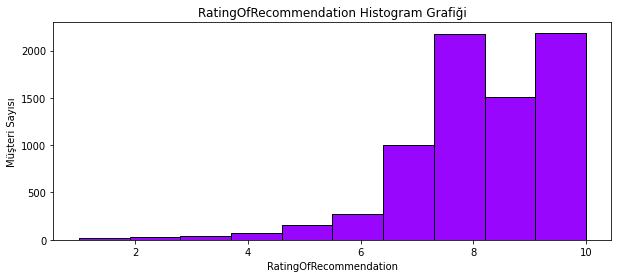

In [73]:
# Müşterilerin yakınlarına ve arkadaşlarına ne derecede Insider'ı önerdiklerini inceleyelim.
# 1: Kesinlikle önermem, 10: Kesinlikle öneririm
histogramgrafigi(data, 'RatingOfRecommendation')

### <span style="color: #556b2f ;">Öneri derecesinde (8 seviyesi hariç) gittikçe yükselen bir eğri görüyoruz. Ayrıca müşteriler yüksek oranda ürünümüzden memnun ve yakınlarına önermeye yatkın. Bu yönde pazarlama çalışmaları ile, arkadaşını getirene bonuslar kazandırmak gibi vb, daha fazla müşteri elde edilebilir ve pazar payı arttırılabilir.</span>

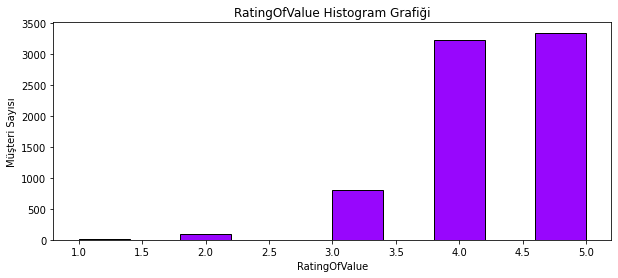

In [74]:
histogramgrafigi(data, 'RatingOfValue')

### <span style="color: #556b2f ;">Dağılımı incelediğimizde görüyoruz ki müşterilerimizin büyük bir kısmı ürünümüzden yüksek miktarda değer elde ediyor. Fakat yaklaşık 1000 gibi bir sayıda müşteri ortalamanın altında bir değer elde etmiş. Bu müşteriler ile iletişime geçilip hangi konularda sıkıntı yaşadıkları ve niçin değer elde edemedikleri hakkında veriler toplarsak ilerideki süreçler daha sağlıklı ve kaliteli geçecektir. Ayrıca kişisel şekilde müşterilere ulaşmak hem müşterinin markaya bağlılığını arttıracak hem de markanın imajını yükseltecektir.</span>

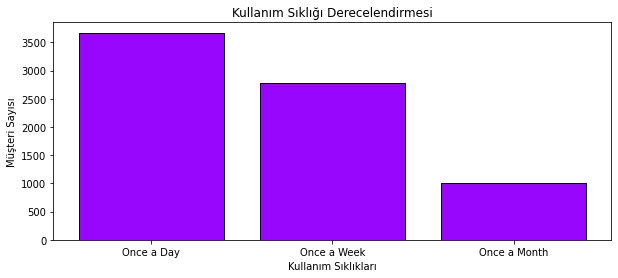

In [75]:
sayac = data['FrequencyOfUse'].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(sayac.index, sayac.values, color='#9806fd', edgecolor='black')
plt.title('Kullanım Sıklığı Derecelendirmesi')
plt.xlabel('Kullanım Sıklıkları')
plt.ylabel('Müşteri Sayısı')
plt.show()

### <span style="color: #556b2f ;">Bu grafikten görüldüğü üzere müşterilerin neredeyse yarısı günlük olarak ürünümüzü kullanmakta. Yaklaşık yüzde 30 gibi bir müşteri bölümü ise ayda bir ürünümüzü ziyaret ediyor. Bunun belli başlı sebepleri olabilir ve belki bu sebepler sektörel sebepler olabilir. Şu anki önincelemelerimizde müşterilerimizin uygulamamıza daha sık ziyaret etmesi için bir çalışma gerçekleştirebileceği yorumunu yapıyoruz fakat daha derin analizlere geçtiğimizde işin içine sektörleri katarak daha anlamlı içgörüler elde edebiliriz.</span>

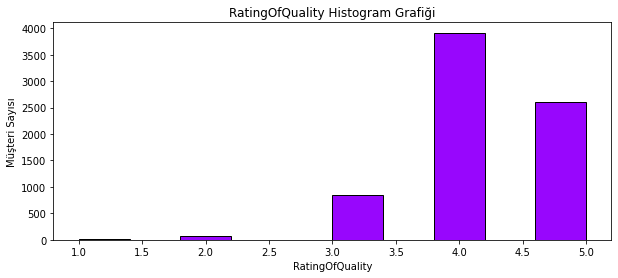

In [76]:
histogramgrafigi(data, 'RatingOfQuality')

### <span style="color: #556b2f ;">Bu grafikte üründen elde edilen değer ile benzer dağılımlar gözlemliyoruz. Müşterilere göre ürünün kalitesi ve üründen elde ettikleri değer doğrusal bir ilişki içerisinde bulunduğu gözüküyor. Kalitede sorun yaşayan müşterilerle iletişime geçmek, ar-ge çalışmalarımıza yardımcı olabilir ve farkında bile olmadığımız hataları düzeltmemizde yardımcı rolde bulunabilir.</span>

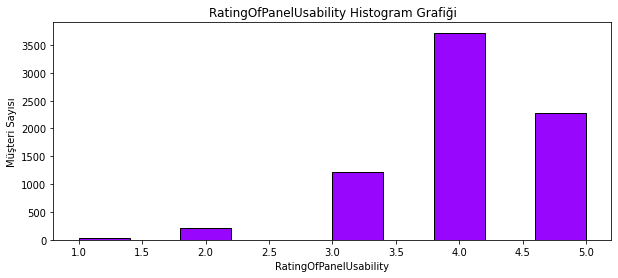

In [77]:
histogramgrafigi(data, 'RatingOfPanelUsability')

### <span style="color: #556b2f ;">Ürünümüzün panelinin kullanılabilirliği doğrudan olarak müşteri memnuniyetini ve bu da kazancımızı etkileyecektir. Daha kullanıcı bir dostu arayüz ile kazancımızı arttırabilir, daha da fazla pozitif bir izlenim bırakabiliriz. </span>

<span style="color: #556b2f ;"> Bknz: https://acikerisim.fsm.edu.tr/xmlui/handle/11352/4782 </span>

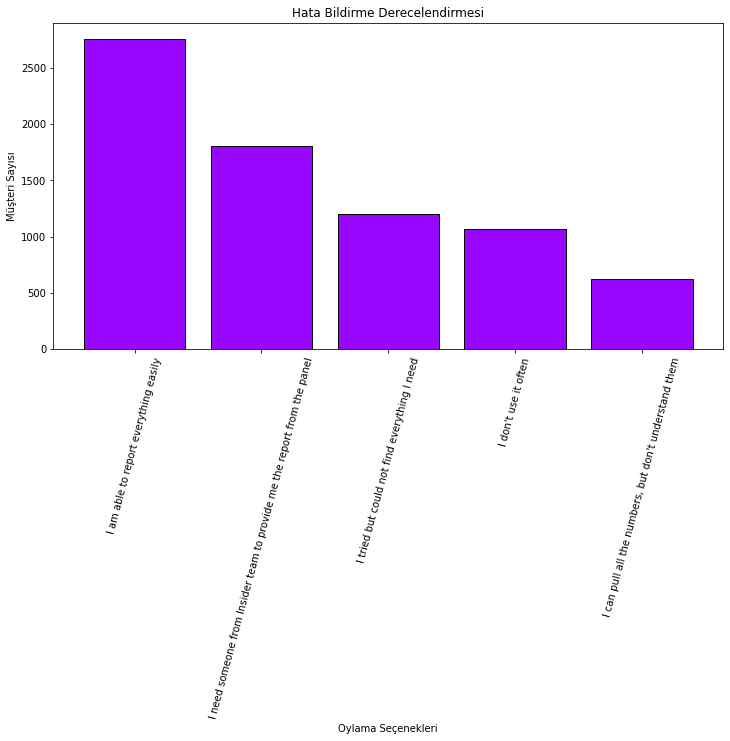

In [78]:
sayac = data['RatingOfReportingCapabilities'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(sayac.index, sayac.values, color='#9806fd', edgecolor='black')
plt.title('Hata Bildirme Derecelendirmesi')
plt.xlabel('Oylama Seçenekleri')
plt.ylabel('Müşteri Sayısı')
plt.tick_params(axis='x', rotation=75)
plt.show()

### <span style="color: #556b2f ;">Verilerimizdeki müşterilerin neredeyse yarısı, hata aldığında ve bir yardıma ihtiyacı bulunduğunda bunu bildirmekte zorluk çekiyor gibi gözüküyor. Bunun önüne geçmek için daha açıklayıcı bir rehber hazırlanabilir. Eğer bulunmuyorsa raporlama hakkında sık sorulan sorular bölümü açılabilir.</span>

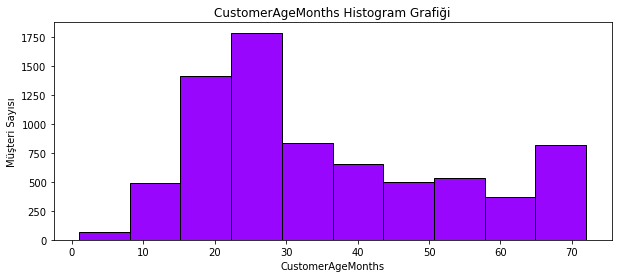

In [79]:
histogramgrafigi(data, 'CustomerAgeMonths')

### <span style="color: #556b2f ;">Müşterilerimizin müşteri olma süresini incelediğimizde, en fazla müşteri bulunduran vakit aralığının 25 ay gibi bir süre olduğunu gözlemliyoruz. Çok uzun süreli müşterilerimiz bulunuyor ve dağılımı incelediğimizde daha da yeni müşteriler elde ediyor gibi gözüküyoruz. Bu doğrultuda yeni pazar payı arttırmak yerine müşterilerimize bir sadakat programı ile kendimize bağlamak daha mantıklı olabilir. Bu problem için ileride bir makine öğrenmesi modeli geliştirerek Churn Analizi gerçekleştirebiliriz.</span>

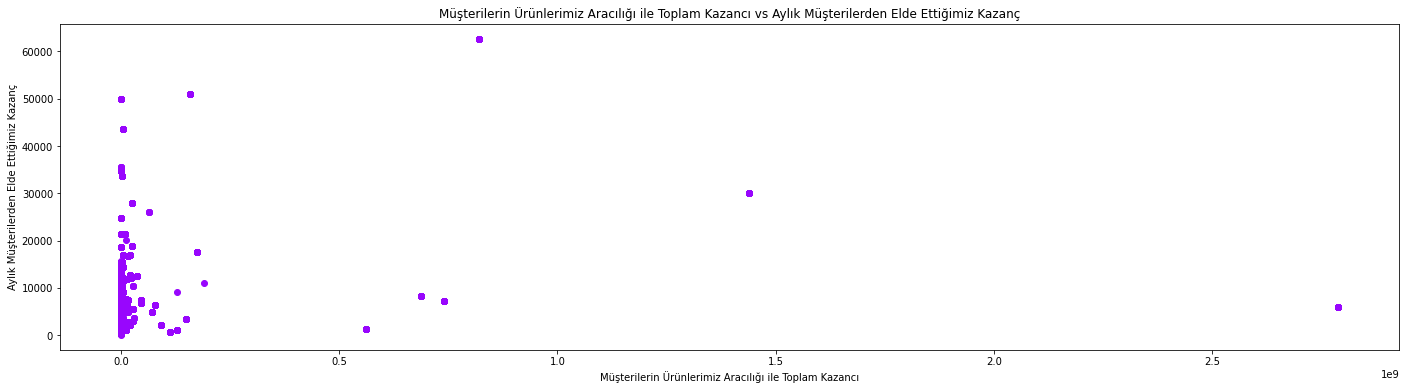

In [80]:
plt.figure(figsize=(24, 6))
plt.scatter(data['Total Revenue'], data['MRR'], color='#9806fd')
plt.title('Müşterilerin Ürünlerimiz Aracılığı ile Toplam Kazancı vs Aylık Müşterilerden Elde Ettiğimiz Kazanç')
plt.xlabel('Müşterilerin Ürünlerimiz Aracılığı ile Toplam Kazancı')
plt.ylabel('Aylık Müşterilerden Elde Ettiğimiz Kazanç')
plt.show()

### <span style="color: #556b2f ;">Müşterilerin kazançlarında fazlaca büyük uç değerler bulunduğu için grafik aşırı anlamsız gözüküyor. Aykırı değerleri filtreleyerek daha anlamlı bir grafik çıkarabiliriz. </span>

<Axes: xlabel='Total Revenue', ylabel='MRR'>

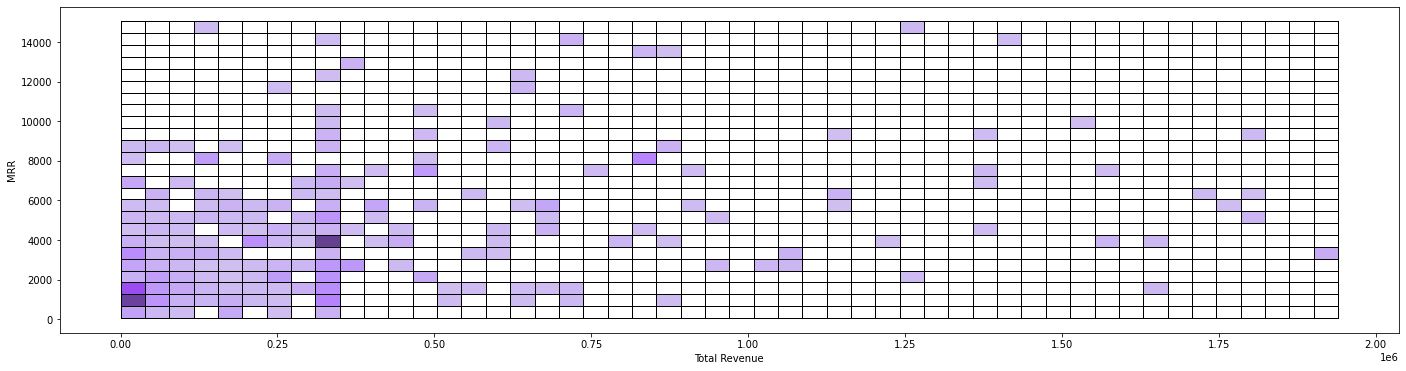

In [81]:
# IQR tekniği ile aykırı değerleri filtreleyelim.
sutunlar = ['Total Revenue', 'MRR']

Q1 = data[sutunlar].quantile(0.25)
Q3 = data[sutunlar].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

grafik_data = data[~((data[sutunlar] < lower_bound) | (data[sutunlar] > upper_bound)).any(axis=1)]

plt.figure(figsize=(24, 6))
sns.histplot(x = grafik_data['Total Revenue'], y= grafik_data['MRR'] , bins=(50,25), color='#9806fd', edgecolor='black')

### <span style="color: #556b2f ;">Müşterilerin büyük bölümü ürünümüze aylık olarak 0-8000 dolar arası bir ücret ödüyor. Fakat bu hizmet alan müşterilerin bizim aracılığımızla kazandığı gelir çok değişkenlik gösteriyor. Daha anlamlı içgörüler çıkarmak için sektör veya iş bilgisi eklenebilir ekstra boyut olarak. </span>

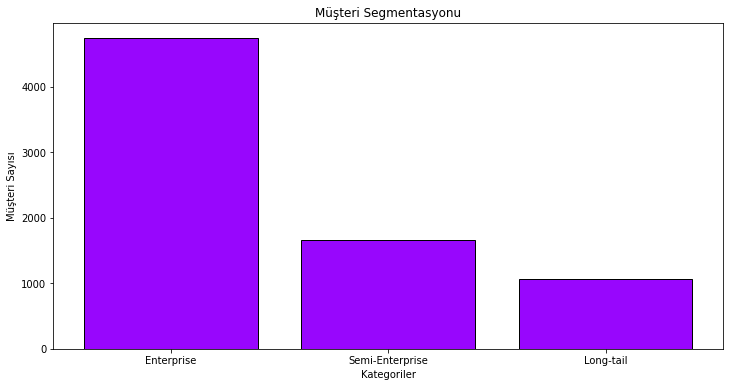

In [82]:
sayac = data['Customer Level'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(sayac.index, sayac.values, color='#9806fd', edgecolor='black')
plt.title('Müşteri Segmentasyonu')
plt.xlabel('Kategoriler')
plt.ylabel('Müşteri Sayısı')
plt.show()

### <span style="color: #556b2f ;">Bizden hizmet alan müşterilerin çoğu kurumsal işletmelermiş. Platformumuzun daha çok kurumsal işletmelere hitap ettiğini söyleyebiliriz. Hatta daha ayrıntılı bir grafik ile platformumuzdan en çok değer kazanan işletme türünün hangisi olduğunu inceleyerek bunun üzerine çalışmalar gerçekleştirebilir, kurumsal dışındaki diğer türlerin platformda neden başarılı olamadığı hakkında araştırmalar yapabiliriz. </span>

### <span style="color: #556b2f ;">Müşteriler üzerinde temel izlenimler ve görselleştirmeler yaptığımıza göre daha detaylı ve daha boyutlu derin analizlere geçebiliriz.</span>

# <span style="color: #66cdaa ;">İleri Veri Görselleştirmeleri ve Detaylı Analiz</span>

In [83]:
# Bar grafiği fonksiyonu tanımlayalım.
def bargrafigi(data,a,b,arka):
    plt.figure(figsize=(10,6))
    sns.barplot(x=a,y=b,data=data,hue=arka)
    plt.xticks(rotation=90)

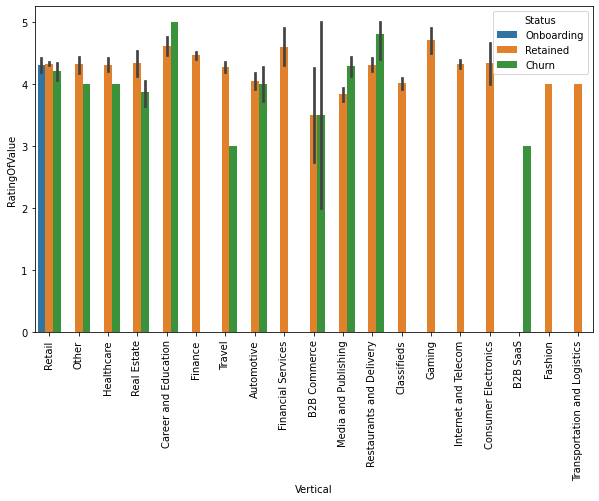

In [84]:
bargrafigi(data,'Vertical','RatingOfValue','Status')

### <span style="color: #556b2f ;">Elimizdeki veriye göre çoğu sektör aktif olarak çalışıyor. Churn olanlar genellikle daha az verim aldığını oylasa da bazı istisnalar bulunuyor bu durum için. Örnek: Career and Education ve Media and Publishing sektörleri. Bu grafikten genel olarak müşteri kitlemiz ürünümüzden iyi derecede değer kazanabiliyor. Bir müşterinin Churn olup olmadığını gösterecek daha farklı grafiklere ihtiyacımız var. </span>

In [85]:
sayisal_sutunlar = data.select_dtypes(include=['float64']).columns
obje_sutunlar = data.select_dtypes(include=['object']).columns

print(f"Karakteristik sütunlar: {list(obje_sutunlar)}")
print(f"Sayısal sütunlar: {list(sayisal_sutunlar)}")

Karakteristik sütunlar: ['CustomerID', 'Survey Date', 'Response Date', 'FrequencyOfUse', 'RatingOfReportingCapabilities', 'Region', 'Vertical', 'Subvertical', 'Status', 'Customer Level']
Sayısal sütunlar: ['Year', 'Quarter', 'RatingOfRecommendation', 'RatingOfValue', 'RatingOfQuality', 'RatingOfPanelUsability', 'CustomerAgeMonths', 'MRR', 'Total Revenue', 'Help Ticket Count', 'HelpTicketLeadTimeHours', 'Product Bug Task Count']


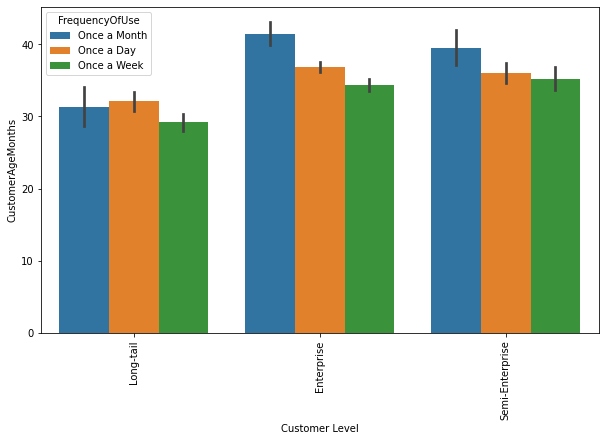

In [86]:
bargrafigi(data, 'Customer Level', 'CustomerAgeMonths', 'FrequencyOfUse' )

### <span style="color: #556b2f ;">Kurumsal ve yarı kurumsal işletmelerin çoğunluğu ayda bir ürünümüzü kullanıyormuş ve neredeyse her tür müşteri seviyesinde müşterilerin müşteri yaşı arttıkça ürünü ziyaret etme sıklığı azalıyor gibi gözüküyor. </span>

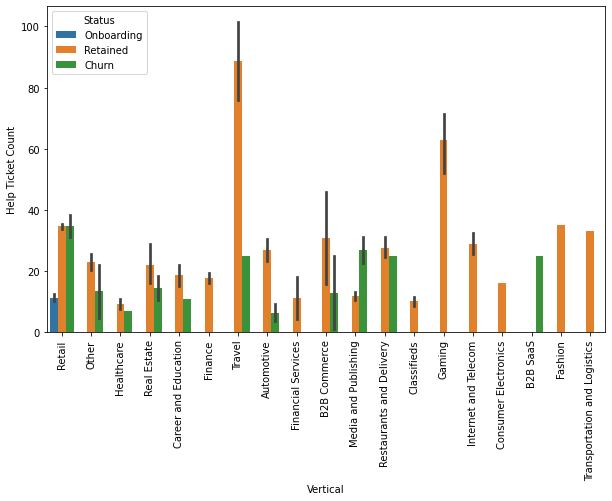

In [87]:
bargrafigi(data, 'Vertical', 'Help Ticket Count', 'Status' )

### <span style="color: #556b2f ;">Görünüşe göre Travel ve Gaming sektörlerinde çok yüksek yardım talepleri oluşturuluyor. Media ve Publishing gibi bazı sektörlerde ise help ticket count yüksek ise müşterinin churn olabileceğini görüyoruz fakat diğer sektörlerin çoğunda böyle bir durum yok. Bu ticketların ne kadar sürede çözüldüğü ile alakalı olabilir. İncelememiz gerek. </span>

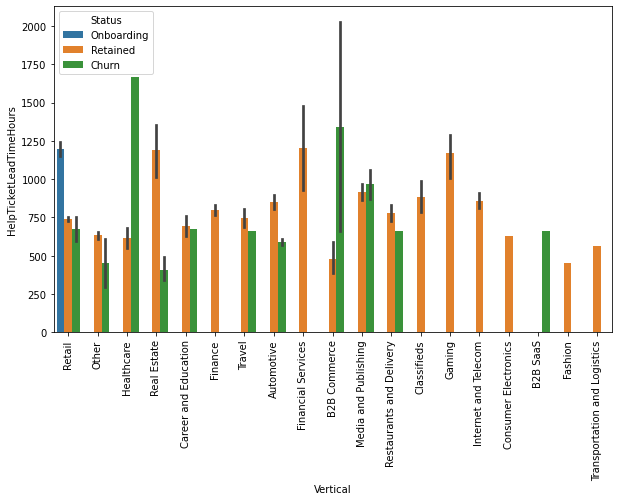

In [88]:
bargrafigi(data, 'Vertical', 'HelpTicketLeadTimeHours', 'Status' )

### <span style="color: #556b2f ;">İşte şimdi bir korelasyon gözlemleyebiliriyoruz. Yardım süresi ne kadar uzarsa Churn olma oranı o kadar yüksek gibi gözüküyor. Churn durumunu tahmin edilmek üzere kurulacak bir modelde bu bulguları önceden bulmak özellik seçiminde önemli bir yere sahip.</span>

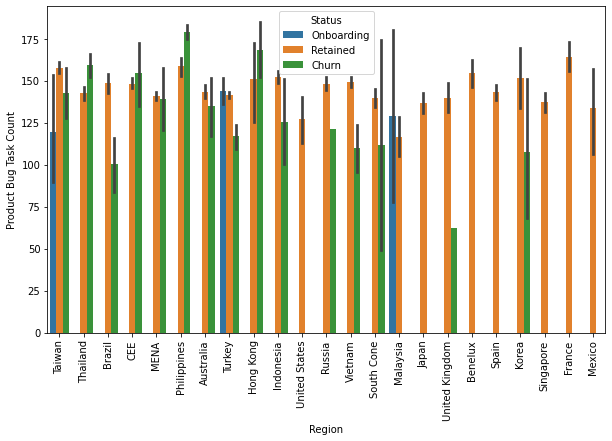

In [89]:
bargrafigi(data, 'Region', 'Product Bug Task Count', 'Status' )

### <span style="color: #556b2f ;">Bu grafikten de Churn oranının üründeki hatalar ile ilişki gösterdiğini gözlemlemekteyiz.</span>